In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [ ]:
patients = pd.read_csv('/content/PATIENTS.csv')
patients

In [ ]:
prescriptions = pd.read_csv('/content/PRESCRIPTIONS.csv')
prescriptions

In [ ]:
len(patients[patients['expire_flag'] == 1])

100

In [ ]:
icu = pd.read_csv('/content/ICUSTAYS.csv')
icu

In [ ]:
len(icu['row_id'].unique())

136

In [ ]:
len(icu['subject_id'].unique())

100

In [ ]:
patients

In [ ]:
micro_biology_events = pd.read_csv('/content/MICROBIOLOGYEVENTS.csv')
micro_biology_events

In [ ]:
diagnosis = pd.read_csv('/content/DIAGNOSES_ICD.csv')
diagnosis

In [ ]:
d_items = pd.read_csv('/content/D_ITEMS.csv')
d_items

In [ ]:
df3 = pd.read_csv('/content/TRANSFERS.csv')
df3

In [ ]:
len(df3['subject_id'].unique())

100

In [ ]:
df3

In [ ]:
output_events = pd.read_csv('/content/OUTPUTEVENTS.csv')
output_events

In [ ]:
dicd = pd.read_csv('/content/D_ICD_DIAGNOSES.csv')
dicd

In [ ]:
dicd.loc[14564]['long_title']

'Contact with and (suspected) exposure to other potentially hazardous chemicals'

In [ ]:
dicd.loc[14564]['short_title']

'Cont/exp hazard chem NEC'

In [ ]:
dicdp = pd.read_csv('/content/D_ICD_PROCEDURES.csv')
dicdp

In [ ]:
ditems = pd.read_csv('/content/D_ITEMS.csv')
ditems

In [ ]:
len(dicdp['icd9_code'].unique())

3809

In [ ]:
len(dicd['icd9_code'].unique())

14567

In [ ]:
df = pd.read_csv('/content/PROCEDURES_ICD.csv')
df

In [ ]:
df = pd.read_csv('/content/ICUSTAYS.csv')
df

In [ ]:
df3  = pd.read_csv('/content/CPTEVENTS.csv')
df3

In [ ]:
df = pd.read_csv('/content/OUTPUTEVENTS.csv')
df

In [ ]:
df4 = pd.read_csv('/content/CALLOUT.csv')
df4

In [3]:
data = pd.read_csv('/content/mimic3d.csv')
data

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.16,2.59,0.00,na,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,0.25,2.23,0.99,Endosc control gast hem,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,0.00,0.75,0.17,Non-invasive mech vent,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,0.41,0.69,0.27,Part sm bowel resect NEC,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,0.00,3.69,0.82,Aortocor bypas-3 cor art,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,M,60,24.58,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,DIVORCED,UNKNOWN/NOT SPECIFIED,0.00,0.37,0.53,Aortcor bypas-4+ cor art,0.94,330.92,66.56,0.20,0.13,23.11,8.01,0.00,0.08,1315.46,0,1746.31,3
58972,199994,F,58,9.75,EMERGENCY,EMERGENCY ROOM ADMIT,MENTAL STATUS CHANGES,Medicare,CATHOLIC,SINGLE,WHITE,0.00,0.92,0.41,Cont inv mec ven <96 hrs,0.62,95.18,53.03,2.26,0.30,7.90,0.00,0.00,0.31,674.05,0,834.98,2
58973,199995,M,23,16.75,EMERGENCY,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,Private,PROTESTANT QUAKER,SINGLE,WHITE,0.00,0.60,0.54,Opn/oth rep aort vlv-tis,0.06,12.66,27.28,0.54,0.10,6.27,5.79,0.00,0.36,207.10,0,261.30,3
58974,199998,M,69,5.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,WHITE,0.00,2.72,0.51,Aortocor bypas-2 cor art,0.17,25.85,49.83,0.17,0.35,12.24,17.69,0.00,1.02,426.87,0,537.42,1


In [9]:
data = data.dropna()

In [10]:
print(data.shape)
data.info()
data.describe()

(48588, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48588 entries, 0 to 58975
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hadm_id           48588 non-null  int64  
 1   gender            48588 non-null  object 
 2   age               48588 non-null  int64  
 3   LOSdays           48588 non-null  float64
 4   admit_type        48588 non-null  object 
 5   admit_location    48588 non-null  object 
 6   AdmitDiagnosis    48588 non-null  object 
 7   insurance         48588 non-null  object 
 8   religion          48588 non-null  object 
 9   marital_status    48588 non-null  object 
 10  ethnicity         48588 non-null  object 
 11  NumCallouts       48588 non-null  float64
 12  NumDiagnosis      48588 non-null  float64
 13  NumProcs          48588 non-null  float64
 14  AdmitProcedure    48588 non-null  object 
 15  NumCPTevents      48588 non-null  float64
 16  NumInput          48588 non-

,hadm_id,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000,48588.000000
mean,149973.267494,61.143657,9.927714,0.116635,2.641571,0.747433,1.227098,31.806490,49.626858,1.306942,3.303416,7.895968,10.850128,0.775571,0.943240,550.278174,0.105993,661.519524,1.416955
std,28912.630798,16.855976,10.840186,0.170397,7.422006,3.096268,1.970410,63.828069,69.689082,3.800919,58.273692,7.427768,12.101299,2.077192,2.088998,657.978437,0.307832,781.324433,1.109164
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124929.500000,51.000000,4.000000,0.000000,0.870000,0.210000,0.410000,5.930000,31.990000,0.197500,0.140000,2.830000,6.330000,0.000000,0.380000,236.530000,0.000000,300.790000,1.000000
50%,150025.000000,62.000000,6.880000,0.070000,1.480000,0.420000,1.130000,15.080000,40.880000,0.640000,0.310000,6.280000,9.280000,0.000000,0.630000,427.160000,0.000000,513.635000,1.000000
75%,175057.250000,75.000000,11.880000,0.180000,2.570000,0.730000,1.660000,36.320000,52.660000,1.510000,0.770000,11.270000,12.960000,1.080000,1.000000,721.780000,0.000000,844.055000,2.000000
max,199999.000000,89.000000,294.630000,4.760000,450.000000,250.000000,225.000000,6825.000000,5175.000000,375.000000,5625.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,3.000000


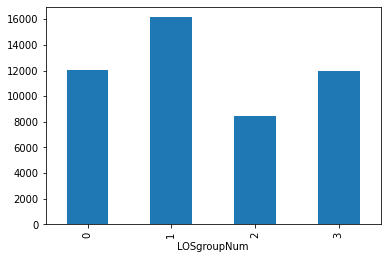

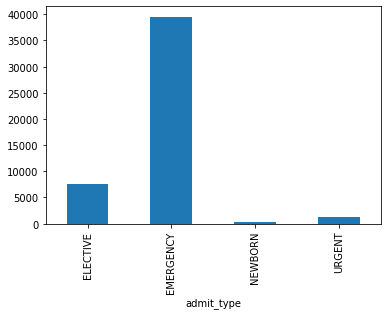

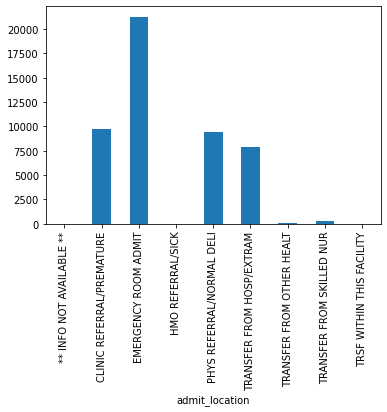

In [11]:
data.groupby('LOSgroupNum').size().plot.bar()
plt.show()
data.groupby('admit_type').size().plot.bar()
plt.show()
data.groupby('admit_location').size().plot.bar()
plt.show()

In [14]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
#from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical

print(os.getcwd())
print("Modules imported \n")
import os
#print(os.listdir("../input/"))

/content
Modules imported 



In [15]:
y = data['LOSgroupNum']
X = data.drop('LOSgroupNum', 1)
X = X.drop('LOSdays', 1)
X = X.drop('ExpiredHospital', 1)
X = X.drop('AdmitDiagnosis', 1)
X = X.drop('AdmitProcedure', 1)
X = X.drop('marital_status', 1)
X = X.drop('ethnicity', 1)
X = X.drop('religion', 1)
X = X.drop('insurance', 1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (48588,)
X - No Label No id  (48588, 19)
Index(['hadm_id', 'gender', 'age', 'admit_type', 'admit_location',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract'],
      dtype='object')


In [16]:
print(X.shape)
categorical_columns = [
                    'gender',                     
                    'admit_type',
                    'admit_location'
                      ]

for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(48588, 19)
(48588, 31)


In [17]:
print(data.shape)
print(X.shape)
#XnotNorm = np.array(X.copy())
XnotNorm = X.copy()
print('XnotNorm ', XnotNorm.shape)

ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)


(48588, 28)
(48588, 31)
XnotNorm  (48588, 31)
ynotNorm  (48588,)


In [18]:
x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
#print(XNorm)
#print(y)
print('X normalized')

X normalized


In [21]:
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=7)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (38870, 31)
X_test:  (9718, 31)
y_train:  (38870,)
y_test:  (9718,)


In [22]:
seed = 42
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
#Mymodels.append(('LogReg', LogisticRegression()))
Mymodels.append(('RandomForestClassifier', RandomForestClassifier()))
Mymodels.append(('SGDclassifier', SGDClassifier()))
#Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))
Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
#Mymodels.append(('GaussianNB', GaussianNB()))
#Mymodels.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

RandomForestClassifier: 0.895549 (0.002832)
SGDclassifier: 0.646951 (0.017081)
DecisionTreeClassifier: 0.852611 (0.006188)


In [30]:

model = RandomForestClassifier()

param_grid = [{}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [31]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

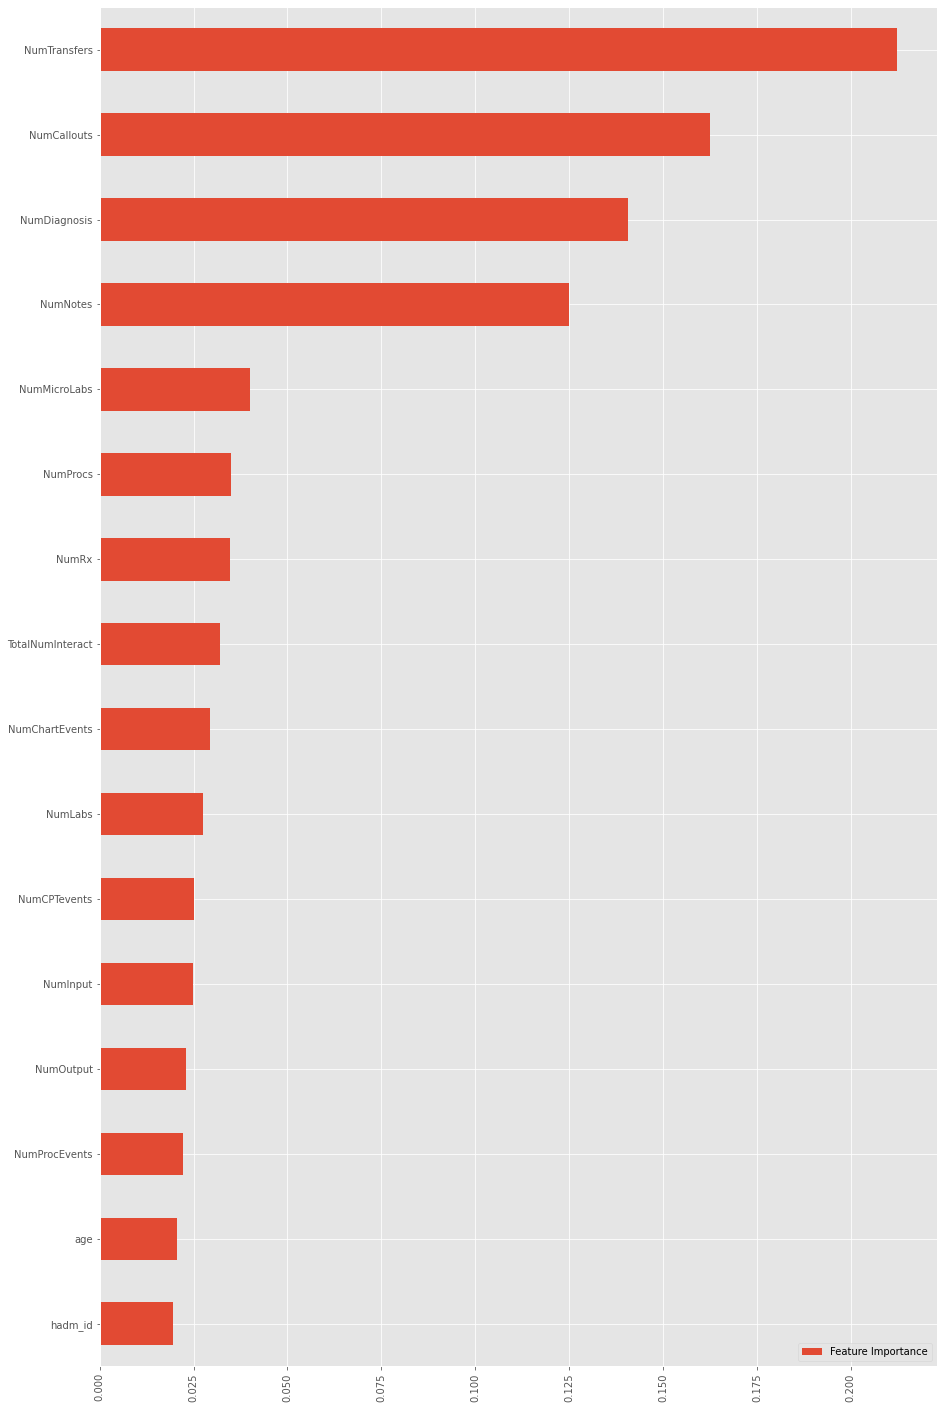

In [32]:

trainFinalFI = XNorm
yFinalFI = y

model.fit(trainFinalFI,yFinalFI)

FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model[FI_model["Feature Importance"] > 0.005].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [33]:
FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model=FI_model.sort_values('Feature Importance', ascending = False)
print(FI_model[FI_model["Feature Importance"] > 0.001])

                           Feature Importance
NumTransfers                         0.212255
NumCallouts                          0.162399
NumDiagnosis                         0.140654
NumNotes                             0.125006
NumMicroLabs                         0.040011
NumProcs                             0.035053
NumRx                                0.034699
TotalNumInteract                     0.032144
NumChartEvents                       0.029493
NumLabs                              0.027560
NumCPTevents                         0.025242
NumInput                             0.024918
NumOutput                            0.022936
NumProcEvents                        0.022230
age                                  0.020682
hadm_id                              0.019444
PHYS REFERRAL/NORMAL DELI            0.003887
EMERGENCY ROOM ADMIT                 0.003375
F                                    0.003027
ELECTIVE                             0.003025
M                                 

In [34]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1-np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1-np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

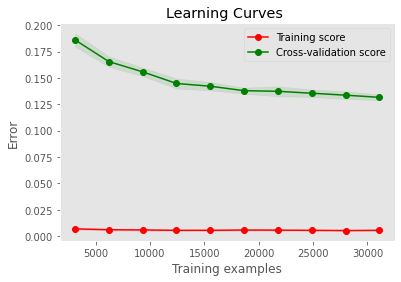

In [35]:
title = "Learning Curves "
cv = ShuffleSplit(n_splits=7, test_size=0.2)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (38870, 31)
X_test:  (9718, 31)
y_train:  (38870,)
y_test:  (9718,)


In [ ]:
model.fit(X_train, y_train)
final_predictions = model.predict(X_test)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)
print('conf_mx ready')

conf_mx ready


In [ ]:
def plot_confusion_matrix(cm,target_names,title='Confusion Matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


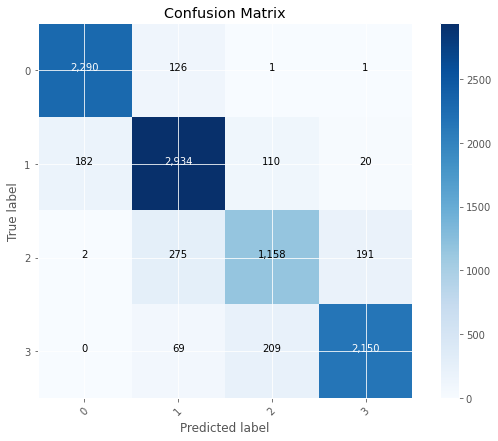

In [ ]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = [0,1,2,3],
                      title        = "Confusion Matrix")

In [4]:
import pickle
#pickle.dump(model,open('model.pkl','wb'))

In [8]:
f = open('model.pkl','rb')
model = pickle.load(f)
print(model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [41]:
accuracy_per_batch = []
for i in np.arange(500,len(XNorm),500):
  y1 = model.predict(XNorm[:i])
  acc = accuracy_score(y[:i],y1)
  accuracy_per_batch.append(acc)

In [ ]:
accuracy_per_batch

In [ ]:
#df1 = XNorm[:500]
#df1

In [43]:
batches = np.arange(500,len(XNorm),500)

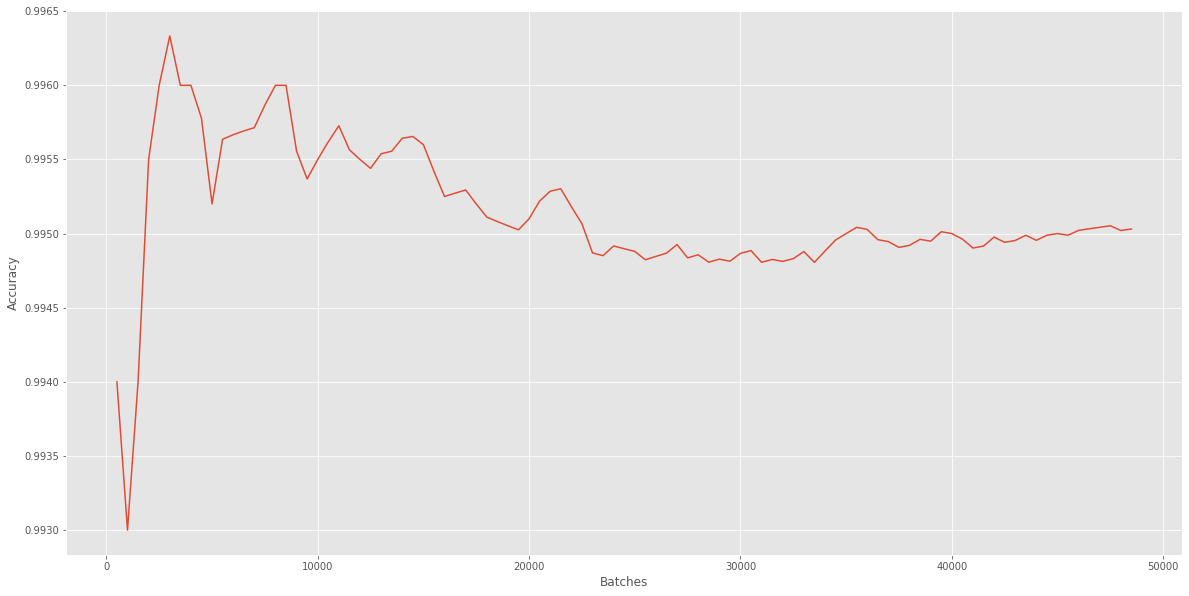

In [50]:
plt.figure(figsize=(20,10))
plt.plot(batches,accuracy_per_batch)
plt.xlabel("Batches")
plt.ylabel("Accuracy")
plt.show()